#### Loading Modules & the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=50
sns.set(style='darkgrid', rc={'axes.facecolor': '#00ff00'})

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Documents\\Computer Projects\\Machine Learning\\Datasets\\heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Column Headers & Dataframe Shape

In [3]:
"""__summary
cp = chest pain
trestbp= resting blood pressure
chol = cholesterol
fbs=fasting blood sugar
restecg=resting elctrocardiography
exang = exercise induced again
oldpeak= ST depression induced
slope = the slope of peak exercise
ca = number of major vessel
thal = normal, texted defect, reversible defect
target = have disease or not (1=yes, 0=no)
"""
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 1025, Columns: 14


#### Distribution of Diseased & Healthy Individuals

In [4]:
# 1 for diseased and 0 for healthy
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

#### Averages of data relative to Target

In [5]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


#### Scatter Plot for the Data

Text(0.5, 1.0, 'Heart Disease vs Age & Maximum Heart Rate')

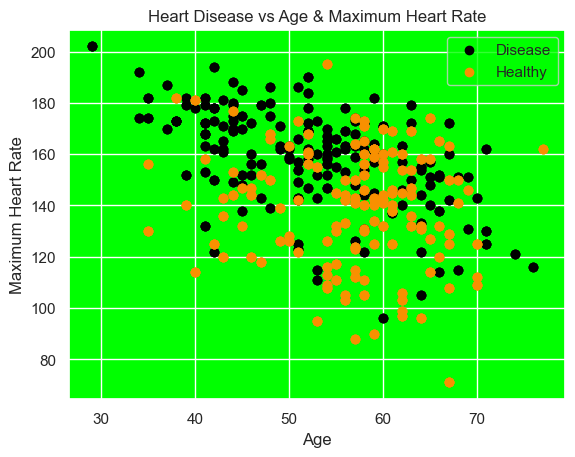

In [6]:
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1], c='#000', label='Disease')
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0], c='#f89000', label='Healthy')

plt.legend()

plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Heart Disease vs Age & Maximum Heart Rate')

In [21]:
y = df.target.values
x_data = df.drop(['target'], axis=1)

#### Normalization

In [22]:
x = (x_data - np.min(x_data)) / (np.max(x_data)) - np.min(x_data)

#### Splitting data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
315,-28.831169,1.0,1.000000,-93.730,-125.790780,0.0,0.0,-70.470297,0.0,0.129032,1.0,0.50,0.666667
204,-28.519481,0.0,0.666667,-93.740,-125.730496,0.0,0.0,-70.599010,0.0,0.000000,0.5,0.25,0.666667
363,-28.688312,1.0,0.666667,-93.820,-125.787234,1.0,0.0,-70.495050,0.0,0.000000,1.0,0.75,0.666667
5,-28.623377,0.0,0.000000,-93.970,-125.783688,0.0,0.0,-70.747525,0.0,0.161290,0.5,0.00,0.666667
1017,-28.688312,1.0,0.000000,-93.855,-125.723404,0.0,0.5,-70.881188,1.0,0.322581,0.5,0.50,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-28.740260,1.0,0.666667,-93.880,-125.959220,0.0,0.0,-70.727723,0.0,0.129032,1.0,0.75,0.666667
192,-28.506494,0.0,0.666667,-93.895,-125.223404,0.0,0.0,-70.559406,0.0,0.258065,0.5,0.00,1.000000
629,-28.532468,1.0,1.000000,-93.780,-125.723404,1.0,0.0,-70.490099,0.0,0.225806,0.5,0.25,0.666667
559,-28.506494,1.0,0.000000,-93.870,-125.803191,0.0,0.5,-71.000000,0.0,0.161290,0.5,0.00,0.666667


#### Transposing

In [29]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#### Accuracies

In [30]:
# Logistic Regression
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracies['LogisticRegression'] = lr.score(x_test, y_test) * 100
accuracies['LogisticRegression']

86.82926829268293

#### K-Nearest Neighbors Classifier

In [31]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
accuracies['KNN'] = knn.score(x_test, y_test) * 100
accuracies['KNN']

88.78048780487805

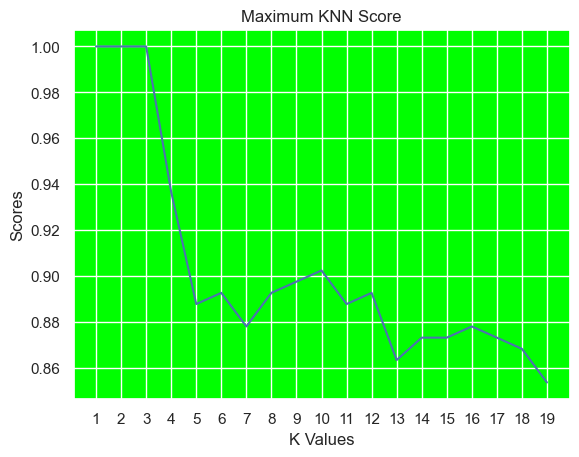

100.0

In [32]:
# Get maximum KNN score for the model
scores = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    scores.append(knn2.score(x_test, y_test))
    
# Display
plt.plot(range(1, 20), scores)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K Values')
plt.ylabel('Scores')
plt.title('Maximum KNN Score')
plt.show()

# Maximum score for the model
acc = max(scores) * 100
accuracies['KNN'] = acc
accuracies['KNN']

#### Support Vector Machine

In [33]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

accuracies['SVM'] = svm.score(x_train, y_train) * 100
accuracies['SVM']

51.09756097560976

#### Naive Bayes Algorithm

In [34]:
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracies['Naive Bayes'] = nb.score(x_test, y_test) * 100
accuracies['Naive Bayes']

85.36585365853658

#### Decision Tree Classifier

In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
accuracies['Decision Tree'] = dtc.score(x_test, y_test) * 100
accuracies['Decision Tree']

100.0

#### Random Forest Classification Algorithm

In [36]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)
accuracies['Random Forest'] = rf.score(x_test, y_test) * 100
accuracies['Random Forest']

100.0

### Comparing the Models

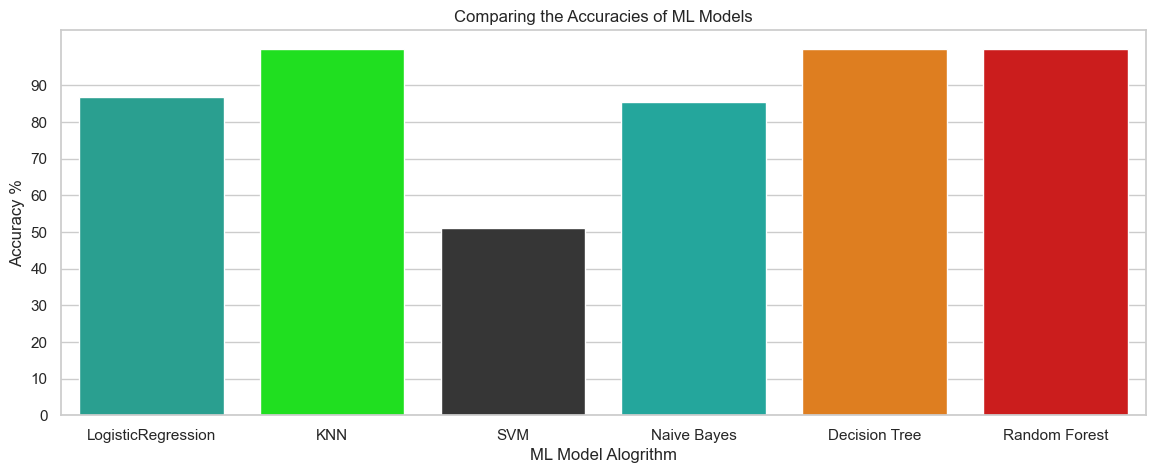

In [37]:
colors = ['#17b29e', '#00ff00', '#363636', '#0fbbae', '#fe7e00', '#e80000']
sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Alogrithm')
plt.title('Comparing the Accuracies of ML Models')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### ML Confusion Matrix

In [38]:
# predicted values
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)

y_head_knn = knn3.predict(x_test)

y_head_svm = svm.predict(x_test)

y_head_nb = nb.predict(x_test)

y_head_dtc = dtc.predict(x_test)

y_head_rf = rf.predict(x_test)

In [39]:
# loading confusion matrix module
from sklearn.metrics import confusion_matrix as cm

cm_lr = cm(y_test, y_head_lr)
cm_knn = cm(y_test, y_head_knn)
cm_svm = cm(y_test, y_head_svm)
cm_nb = cm(y_test, y_head_nb)
cm_dtc = cm(y_test, y_head_dtc)
cm_rf = cm(y_test, y_head_rf)

<Axes: title={'center': 'Random Forest Confusion Matrix'}>

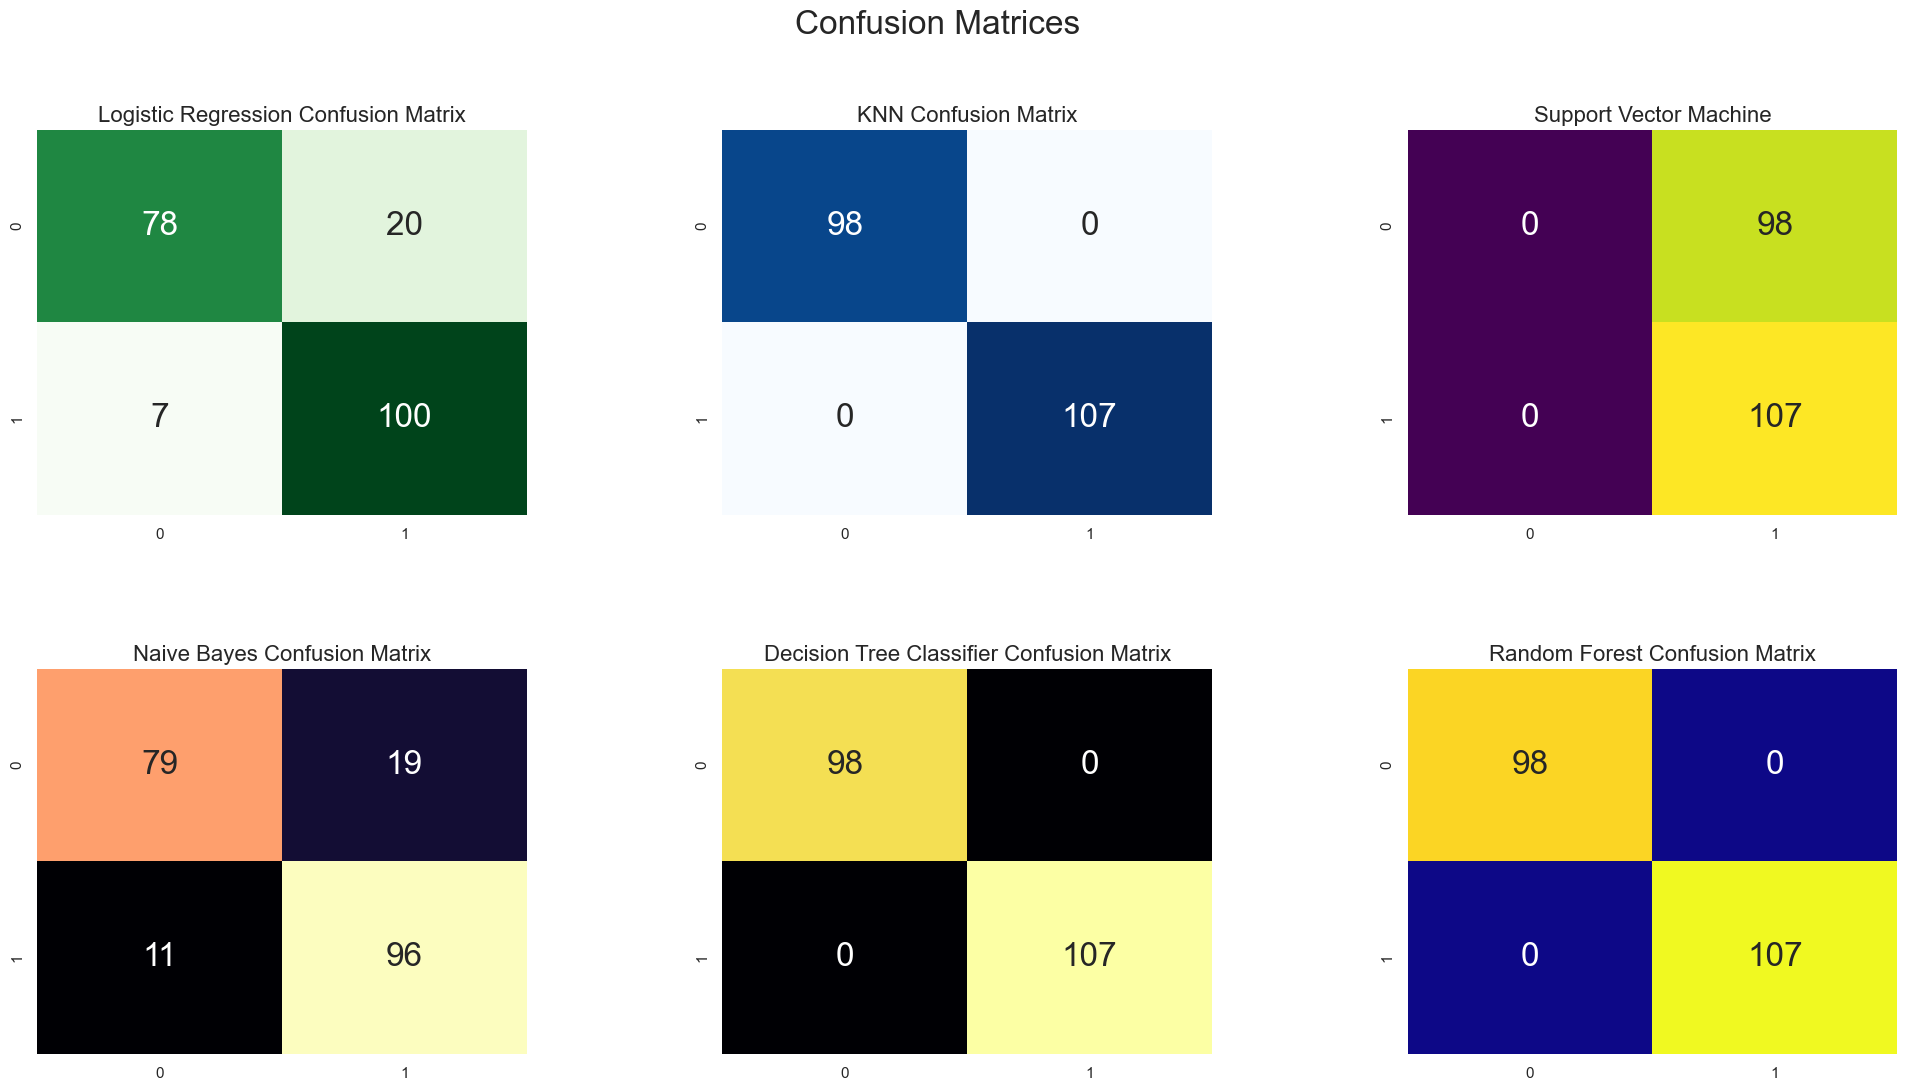

In [40]:
# Plotting
plt.figure(figsize=(24, 12))

plt.suptitle('Confusion Matrices', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace = 0.4)

plt.subplot(2, 3, 1)
plt.title('Logistic Regression Confusion Matrix', fontsize=16)
sns.heatmap(cm_lr, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 2)
plt.title('KNN Confusion Matrix', fontsize=16)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 3)
plt.title('Support Vector Machine', fontsize=16)
sns.heatmap(cm_svm, annot=True, cmap='viridis', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 4)
plt.title('Naive Bayes Confusion Matrix', fontsize=16)
sns.heatmap(cm_nb, annot=True, cmap='magma', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 5)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=16)
sns.heatmap(cm_dtc, annot=True, cmap='inferno', fmt='d', cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 6)
plt.title('Random Forest Confusion Matrix', fontsize=16)
sns.heatmap(cm_rf, annot=True, cmap='plasma', fmt='d', cbar=False, annot_kws={'size':24})